In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import zipfile

# Open the ZIP file
with zipfile.ZipFile('/content/breast+cancer+wisconsin+diagnostic.zip', 'r') as zip_ref:
    # List files in the archive
    print(zip_ref.namelist())


['wdbc.data', 'wdbc.names']


In [ ]:
# Extract the specific file
with zipfile.ZipFile('/content/breast+cancer+wisconsin+diagnostic.zip', 'r') as zip_ref:
    zip_ref.extract('wdbc.data', '/content')  # Extract to the current directory

# Load the extracted file
df = pd.read_csv('/content/wdbc.data', header=None)  # Adjust header and other options as needed


In [ ]:
df.head()


0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.3613  0.08758  
3  0.6638  0.17300  
4  0.2364  0.07678  

[5 rows x 32 columns]

In [ ]:
df.tail()

0  1      2      3       4       5        6        7        8   \
564  926424  M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
565  926682  M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
566  926954  M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
567  927241  M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
568   92751  B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   

          9   ...      22     23      24      25       26       27      28  \
564  0.13890  ...  25.450  26.40  166.10  2027.0  0.14100  0.21130  0.4107   
565  0.09791  ...  23.690  38.25  155.00  1731.0  0.11660  0.19220  0.3215   
566  0.05302  ...  18.980  34.12  126.70  1124.0  0.11390  0.30940  0.3403   
567  0.15200  ...  25.740  39.42  184.60  1821.0  0.16500  0.86810  0.9387   
568  0.00000  ...   9.456  30.37   59.16   268.6  0.08996  0.06444  0.0000   

         29      30       31  
564  0.2216  0.2060  0.07115  
565  0.1628  0.2572  0.06637  
566  0.1418  0.2218  0.07820  
567  0.2650  0.4087  0.12400  
568  0.0000  0.2871  0.07039  

[5 rows x 32 columns]

In [ ]:
df.shape

(569, 32)

In [ ]:
df.describe().T

count          mean           std          min            25%  \
0   569.0  3.037183e+07  1.250206e+08  8670.000000  869218.000000   
2   569.0  1.412729e+01  3.524049e+00     6.981000      11.700000   
3   569.0  1.928965e+01  4.301036e+00     9.710000      16.170000   
4   569.0  9.196903e+01  2.429898e+01    43.790000      75.170000   
5   569.0  6.548891e+02  3.519141e+02   143.500000     420.300000   
6   569.0  9.636028e-02  1.406413e-02     0.052630       0.086370   
7   569.0  1.043410e-01  5.281276e-02     0.019380       0.064920   
8   569.0  8.879932e-02  7.971981e-02     0.000000       0.029560   
9   569.0  4.891915e-02  3.880284e-02     0.000000       0.020310   
10  569.0  1.811619e-01  2.741428e-02     0.106000       0.161900   
11  569.0  6.279761e-02  7.060363e-03     0.049960       0.057700   
12  569.0  4.051721e-01  2.773127e-01     0.111500       0.232400   
13  569.0  1.216853e+00  5.516484e-01     0.360200       0.833900   
14  569.0  2.866059e+00  2.021855e+00     0.757000       1.606000   
15  569.0  4.033708e+01  4.549101e+01     6.802000      17.850000   
16  569.0  7.040979e-03  3.002518e-03     0.001713       0.005169   
17  569.0  2.547814e-02  1.790818e-02     0.002252       0.013080   
18  569.0  3.189372e-02  3.018606e-02     0.000000       0.015090   
19  569.0  1.179614e-02  6.170285e-03     0.000000       0.007638   
20  569.0  2.054230e-02  8.266372e-03     0.007882       0.015160   
21  569.0  3.794904e-03  2.646071e-03     0.000895       0.002248   
22  569.0  1.626919e+01  4.833242e+00     7.930000      13.010000   
23  569.0  2.567722e+01  6.146258e+00    12.020000      21.080000   
24  569.0  1.072612e+02  3.360254e+01    50.410000      84.110000   
25  569.0  8.805831e+02  5.693570e+02   185.200000     515.300000   
26  569.0  1.323686e-01  2.283243e-02     0.071170       0.116600   
27  569.0  2.542650e-01  1.573365e-01     0.027290       0.147200   
28  569.0  2.721885e-01  2.086243e-01     0.000000       0.114500   
29  569.0  1.146062e-01  6.573234e-02     0.000000       0.064930   
30  569.0  2.900756e-01  6.186747e-02     0.156500       0.250400   
31  569.0  8.394582e-02  1.806127e-02     0.055040       0.071460   

              50%           75%           max  
0   906024.000000  8.813129e+06  9.113205e+08  
2       13.370000  1.578000e+01  2.811000e+01  
3       18.840000  2.180000e+01  3.928000e+01  
4       86.240000  1.041000e+02  1.885000e+02  
5      551.100000  7.827000e+02  2.501000e+03  
6        0.095870  1.053000e-01  1.634000e-01  
7        0.092630  1.304000e-01  3.454000e-01  
8        0.061540  1.307000e-01  4.268000e-01  
9        0.033500  7.400000e-02  2.012000e-01  
10       0.179200  1.957000e-01  3.040000e-01  
11       0.061540  6.612000e-02  9.744000e-02  
12       0.324200  4.789000e-01  2.873000e+00  
13       1.108000  1.474000e+00  4.885000e+00  
14       2.287000  3.357000e+00  2.198000e+01  
15      24.530000  4.519000e+01  5.422000e+02  
16       0.006380  8.146000e-03  3.113000e-02  
17       0.020450  3.245000e-02  1.354000e-01  
18       0.025890  4.205000e-02  3.960000e-01  
19       0.010930  1.471000e-02  5.279000e-02  
20       0.018730  2.348000e-02  7.895000e-02  
21       0.003187  4.558000e-03  2.984000e-02  
22      14.970000  1.879000e+01  3.604000e+01  
23      25.410000  2.972000e+01  4.954000e+01  
24      97.660000  1.254000e+02  2.512000e+02  
25     686.500000  1.084000e+03  4.254000e+03  
26       0.131300  1.460000e-01  2.226000e-01  
27       0.211900  3.391000e-01  1.058000e+00  
28       0.226700  3.829000e-01  1.252000e+00  
29       0.099930  1.614000e-01  2.910000e-01  
30       0.282200  3.179000e-01  6.638000e-01  
31       0.080040  9.208000e-02  2.075000e-01

In [ ]:
df.diagnosis.unique()

AttributeError: 'DataFrame' object has no attribute 'diagnosis'

In [ ]:
print(df.columns)

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype='int64')


In [ ]:
print(df.head())


         0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.

In [ ]:
df[1].unique()

array(['M', 'B'], dtype=object)

In [ ]:
column_names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
                'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean',
                'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
                'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
                'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
                'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst',
                'symmetry_worst', 'fractal_dimension_worst']

df.columns = column_names
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [ ]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [ ]:
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave_points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave_points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave_points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave_points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave_points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.558000e-03   
radius_worst                 13.010000      14.970000  1.87900

<Axes: xlabel='count', ylabel='diagnosis'>

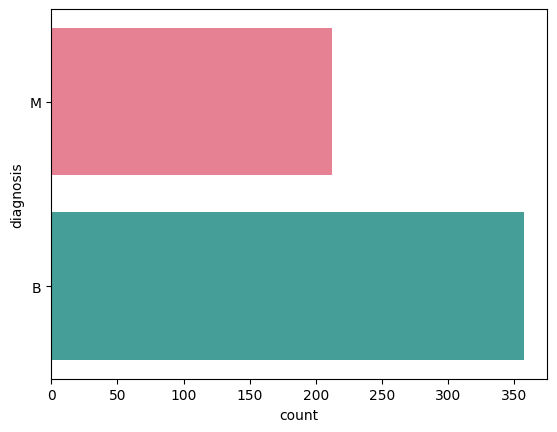

In [ ]:
sns.countplot(df['diagnosis'], palette='husl')

Clean and Prepare Data

In [ ]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave_points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave_points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [ ]:
df.isnull().sum()


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df.corr()

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave_points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.567134     0.679090      0.275869        0.691765   
texture_se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se              0.556141     0.674172      0.281673        0.693135   
area_se                   0.548236     0.735864      0.259845        0.744983   
smoothness_se            -0.067016    -0.222600      0.006614       -0.202694   
compactness_se            0.292999     0.206000      0.191975        0.250744   
concavity_se              0.253730     0.194204      0.143293        0.228082   
concave_points_se         0.408042     0.376169      0.163851        0.407217   
symmetry_se              -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se      0.077972    -0.042641      0.054458       -0.005523   
radius_worst              0.776454     0.969539      0.352573        0.969476   
texture_worst             0.456903     0.297008      0.912045        0.303038   
perimeter_worst           0.782914     0.965137      0.358040        0.970387   
area_worst                0.733825     0.941082      0.343546        0.941550   
smoothness_worst          0.421465     0.119616      0.077503        0.150549   
compactness_worst         0.590998     0.413463      0.277830        0.455774   
concavity_worst           0.659610     0.526911      0.301025        0.563879   
concave_points_worst      0.793566     0.744214      0.295316        0.771241   
symmetry_worst            0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst   0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave_points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave_points_se         0.372320         0.

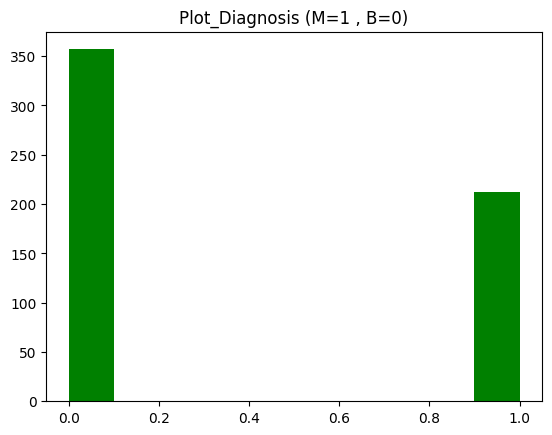

In [ ]:
plt.hist(df['diagnosis'], color='g')
plt.title('Plot_Diagnosis (M=1 , B=0)')
plt.show()

<Axes: >

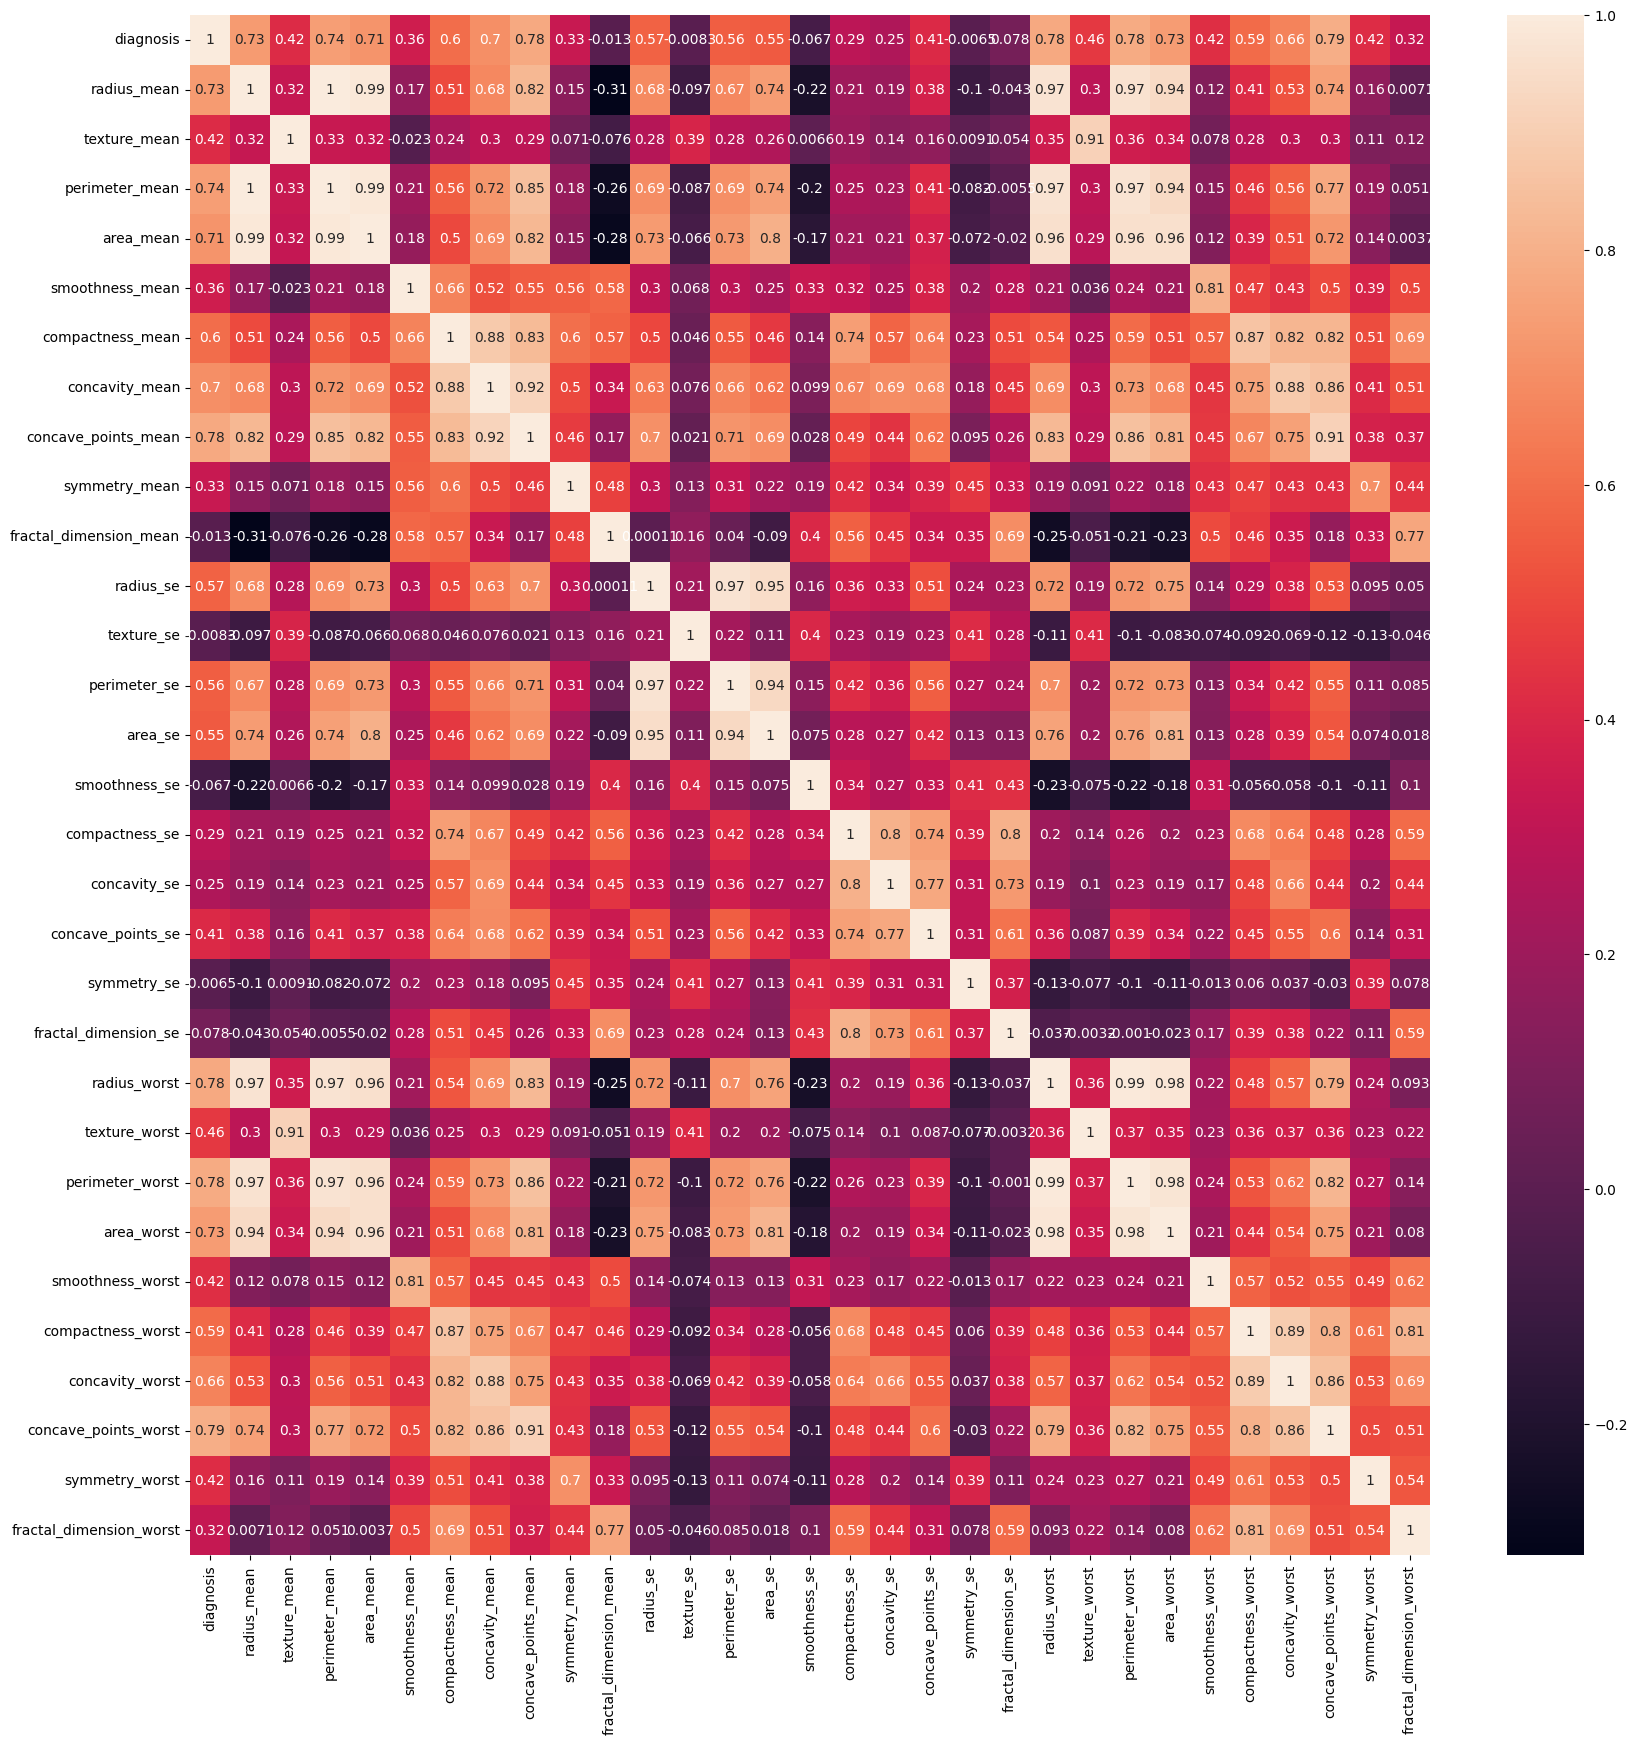

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


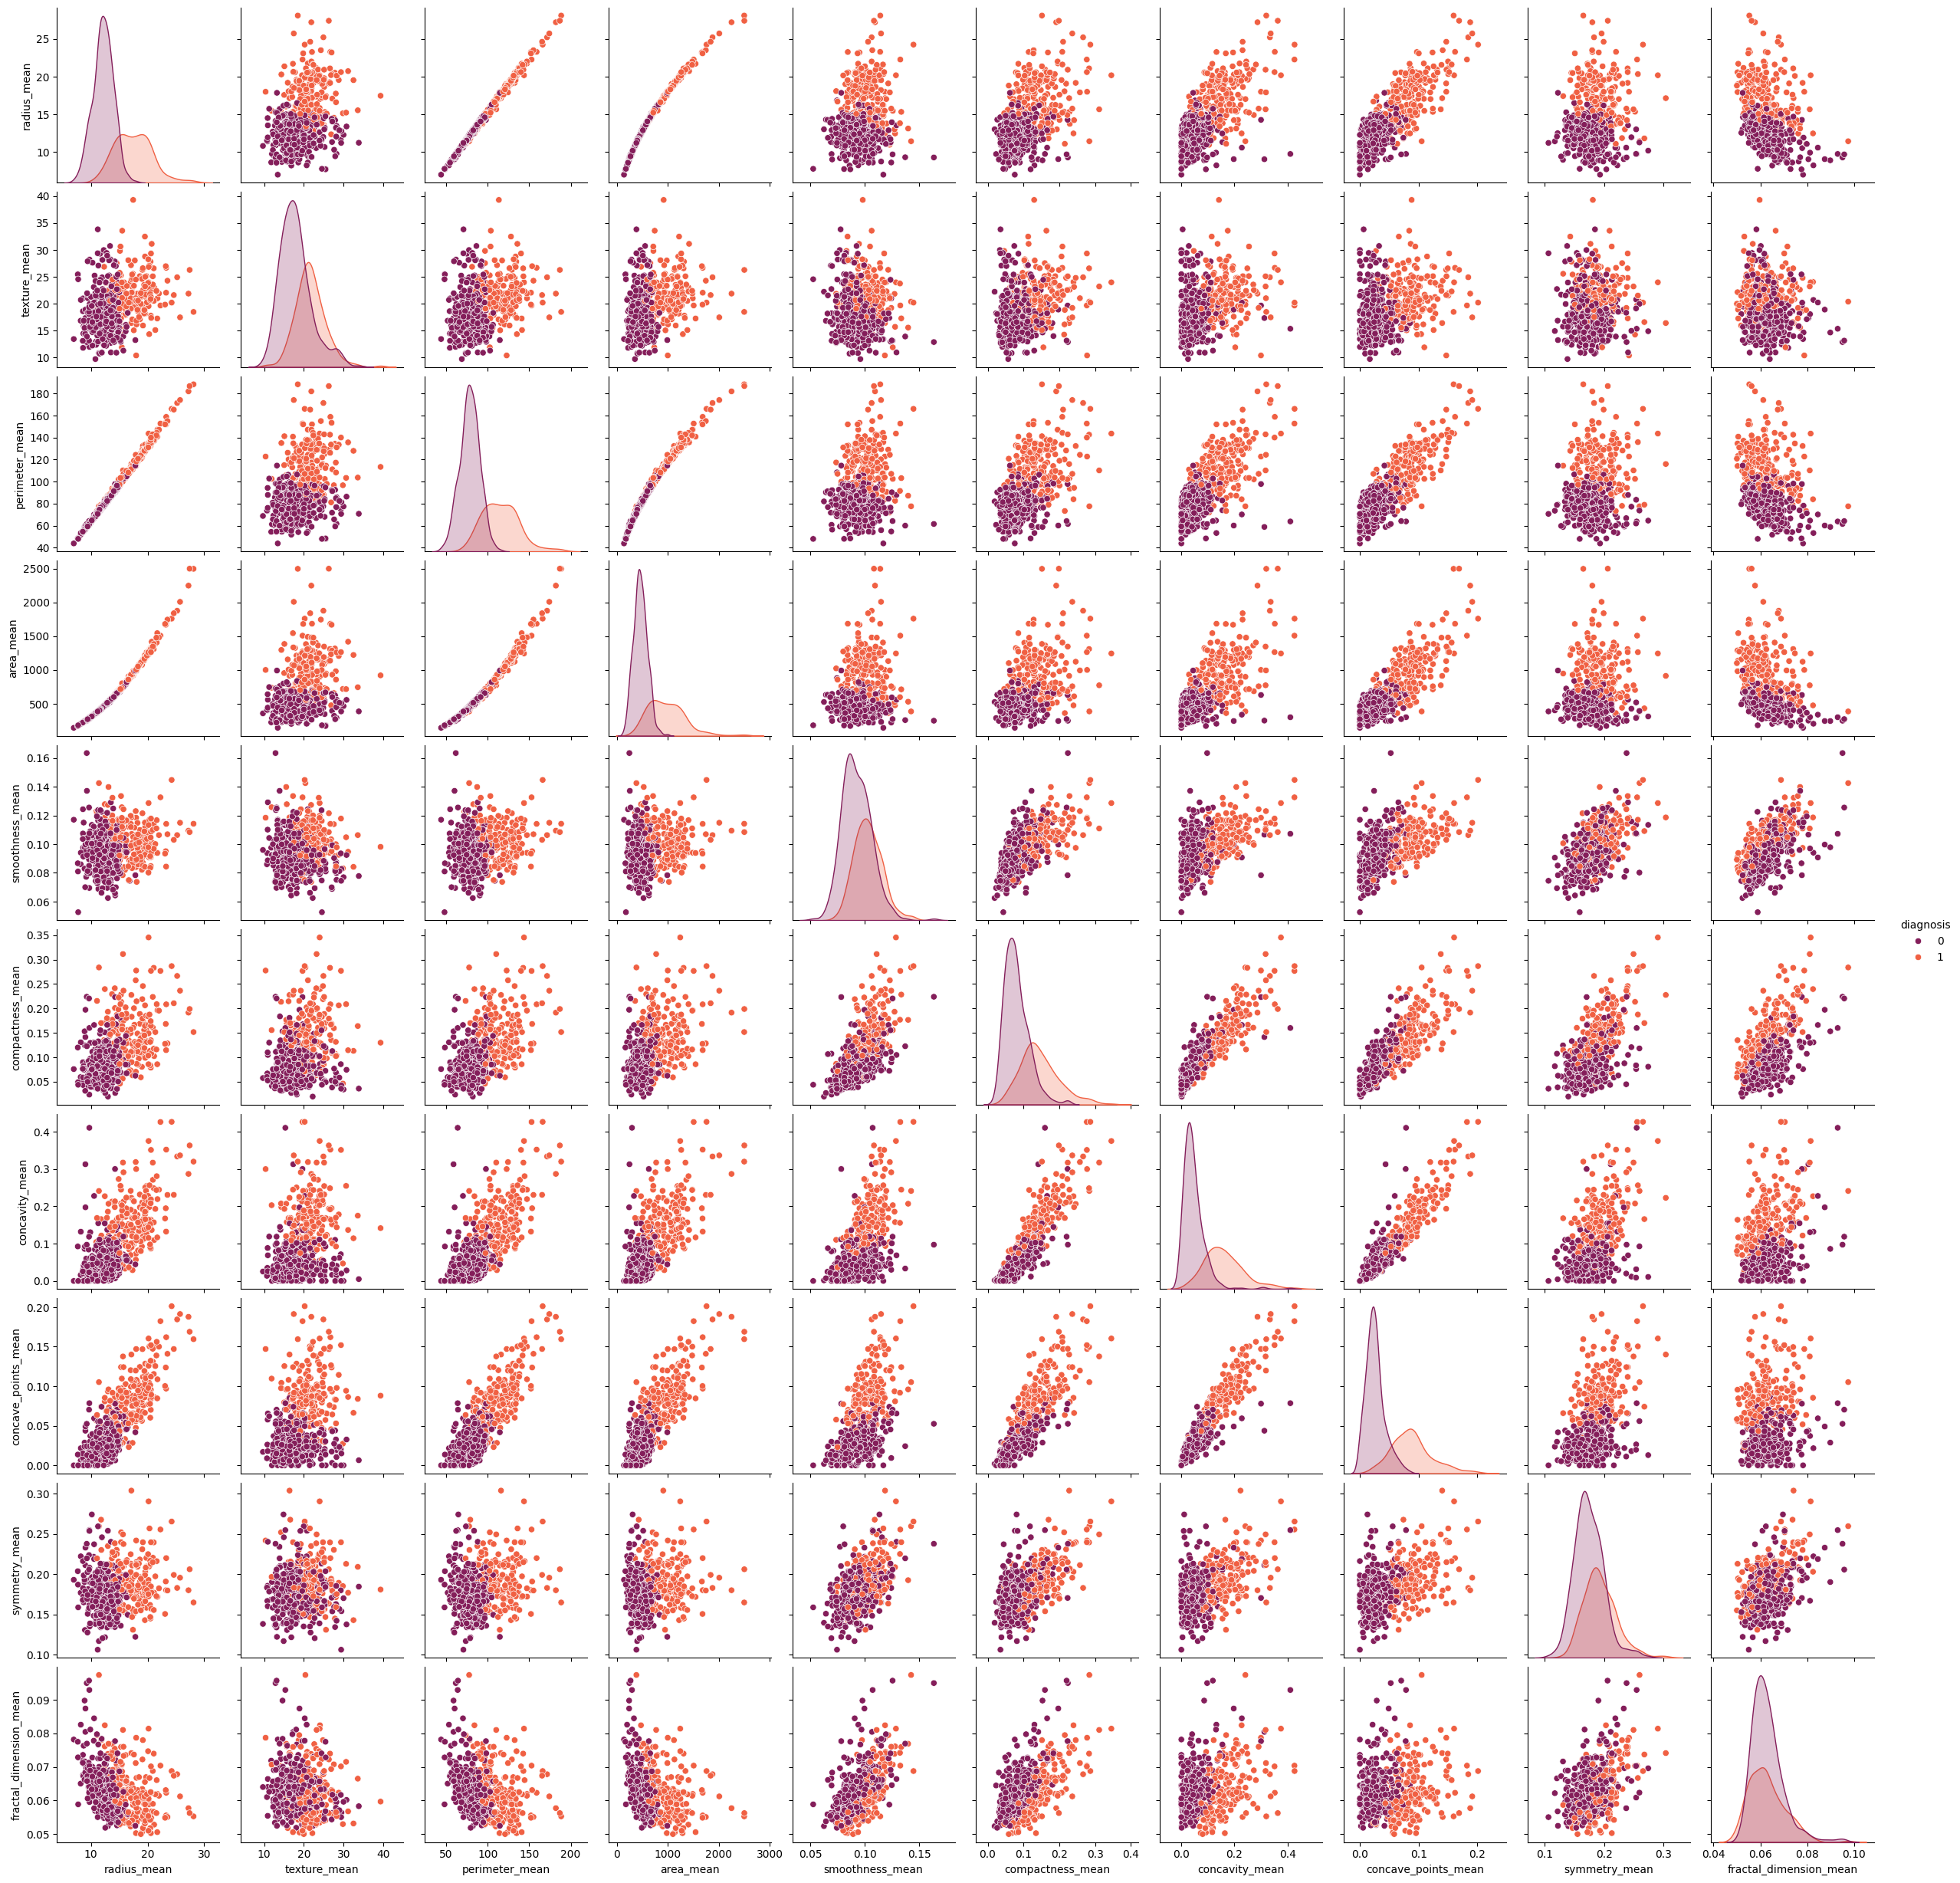

In [ ]:
cols = ['diagnosis',
        'radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean', # The column name may have a typo or extra spaces
        'symmetry_mean',
        'fractal_dimension_mean']

#Verify the actual column name in your dataframe
print(df.columns)

#Correct the column name in the 'cols' list if necessary.
#For example if the actual column name is 'concave_points_mean'
cols = ['diagnosis',
        'radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave_points_mean', # Corrected column name
        'symmetry_mean',
        'fractal_dimension_mean']

sns.pairplot(data=df[cols], hue='diagnosis', palette='rocket')